# Linear SVM using Sklearn
**[For theory & scratch implementation, click here.](./1_scratch.ipynb)**

In [1]:
from sklearn.datasets import make_classification

In [2]:
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_classes=2, random_state=101)

In [3]:
for i in range(len(y)):
    if y[i] == 0:
        y[i] = -1

In [4]:
print("First 5 X: ")
print(X[:5,:])
print("\nFirst 5 y:")
print(y[:5])

First 5 X: 
[[ 2.34669706  1.99811892]
 [ 2.40710326  2.2038783 ]
 [-0.077088   -1.43258858]
 [ 2.73918283  1.15325581]
 [-0.75506174  0.61430643]]

First 5 y:
[ 1  1 -1  1  1]


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [7]:
from sklearn.svm import SVC

In [9]:
svc = SVC(kernel = "linear")

In [10]:
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [11]:
pred = svc.predict(X_test)

In [12]:
from sklearn.metrics import classification_report, confusion_matrix

In [13]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[19  1]
 [ 1 19]]
              precision    recall  f1-score   support

          -1       0.95      0.95      0.95        20
           1       0.95      0.95      0.95        20

    accuracy                           0.95        40
   macro avg       0.95      0.95      0.95        40
weighted avg       0.95      0.95      0.95        40



In [26]:
b0 = svc.intercept_[0]
b1 = svc.coef_[0,0]
b2 = svc.coef_[0,1]
print(b0, b1, b2)

-0.011025110330413312 -0.45471034777967495 1.7125909649247513


In [27]:
x_line = list(range(-4, 5))
y_line = [-(b0+b1*x)/b2 for x in x_line]

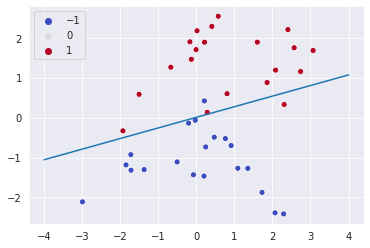

In [29]:
import seaborn as sns
sns.set_style('darkgrid')
sns.lineplot(x=x_line, y=y_line)
sns.scatterplot(x=X_test[:,0], y=X_test[:,1], hue=y_test, palette="coolwarm")

### Same as Scratch implementation. Success!